In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

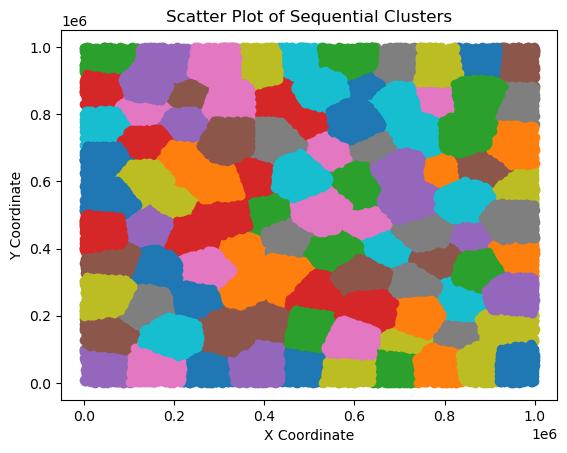

In [67]:
data = pd.read_csv('sequential_clusters.txt')
fig, ax = plt.subplots()
for cluster in data['cluster_id'].unique():
    cluster_data = data[data['cluster_id'] == cluster]
    ax.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster}')
# ax.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Scatter Plot of Sequential Clusters')
plt.show()

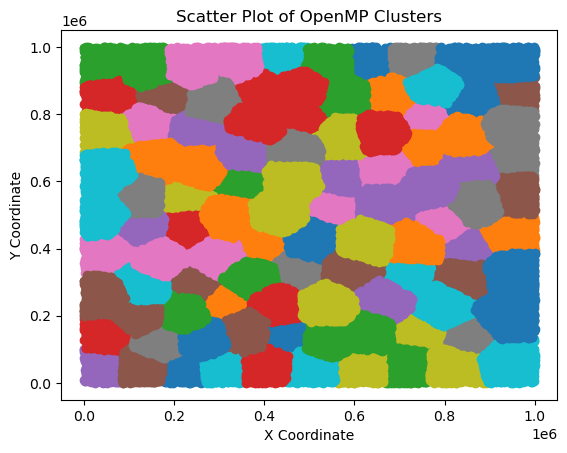

In [68]:
data = pd.read_csv('parallel_clusters.txt')
fig, ax = plt.subplots()
for cluster in data['cluster_id'].unique():
    cluster_data = data[data['cluster_id'] == cluster]
    ax.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster}')
# ax.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Scatter Plot of OpenMP Clusters')
plt.show()

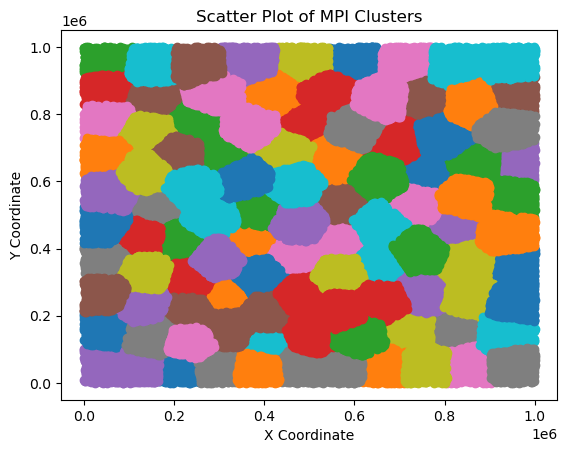

In [69]:
data = pd.read_csv('MPI_clusters.txt')
fig, ax = plt.subplots()
for cluster in data['cluster_id'].unique():
    cluster_data = data[data['cluster_id'] == cluster]
    ax.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster}')
# ax.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Scatter Plot of MPI Clusters')
plt.show()

In [65]:
def parse_log_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    init_time = float(lines[0].strip().split()[-2])
    iters_times = [float(line.strip().split()[-2]) for line in lines[1:-2]]
    total_time = float(lines[-2].strip().split()[-2])
    avg_time = float(lines[-1].strip().split()[-2])
    
    return init_time, iters_times, total_time, avg_time

# File paths
number_of_points = 50000
number_of_clusters = 100
number_of_iterations = 100
number_of_threads_or_processes = 10
address_prefix = 'outputs/method_comparison/'
mpi_file = f'{address_prefix}mpi_{number_of_points}_{number_of_clusters}_{number_of_iterations}_{number_of_threads_or_processes}.txt'
openmp_file = f'{address_prefix}openmp_{number_of_points}_{number_of_clusters}_{number_of_iterations}_{number_of_threads_or_processes}.txt'
sequential_file = f'{address_prefix}sequential_{number_of_points}_{number_of_clusters}_{number_of_iterations}.txt'

# Parsing the log files
mpi_init, mpi_iters, mpi_total, mpi_avg = parse_log_file(mpi_file)
openmp_init, openmp_iters, openmp_total, openmp_avg = parse_log_file(openmp_file)
seq_init, seq_iters, seq_total, seq_avg = parse_log_file(sequential_file)

In [63]:
openmp_init

1.09673e-05

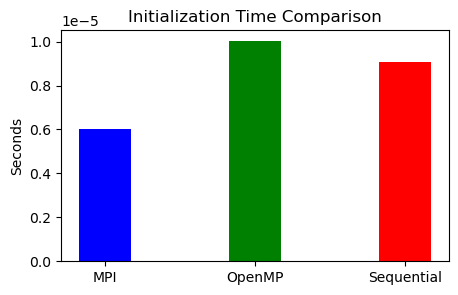

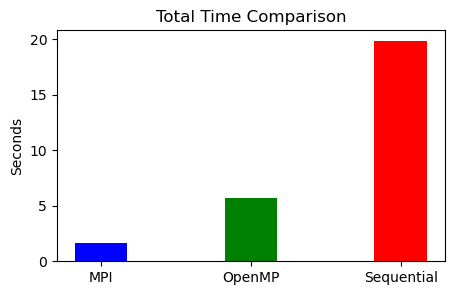

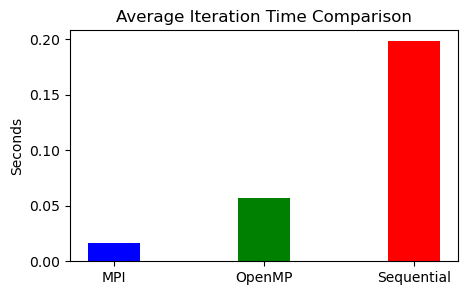

In [66]:
# Data setup
labels = ['MPI', 'OpenMP', 'Sequential']
init_times = [mpi_init, openmp_init, seq_init]
total_times = [mpi_total, openmp_total, seq_total]
avg_times = [mpi_avg, openmp_avg, seq_avg]
colors = ['b', 'g', 'r']
width = 0.35  # the width of the bars

# Initialization time bar chart
plt.figure(figsize=(5, 3))
plt.bar(labels, init_times, color=colors, width=width)
plt.title('Initialization Time Comparison')
plt.ylabel('Seconds')
plt.show()

# Total time bar chart
plt.figure(figsize=(5, 3))
plt.bar(labels, total_times, color=colors, width=width)
plt.title('Total Time Comparison')
plt.ylabel('Seconds')
plt.show()

# Average iteration time bar chart
plt.figure(figsize=(5, 3))
plt.bar(labels, avg_times, color=colors, width=width)
plt.title('Average Iteration Time Comparison')
plt.ylabel('Seconds')
plt.show()


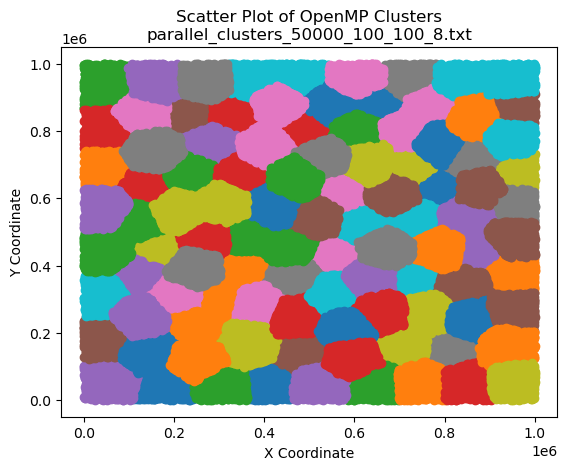

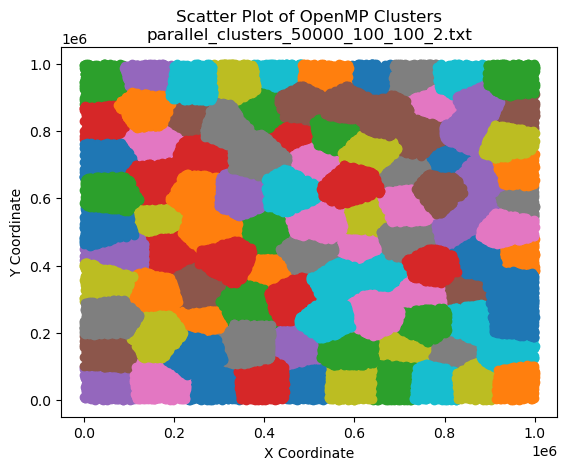

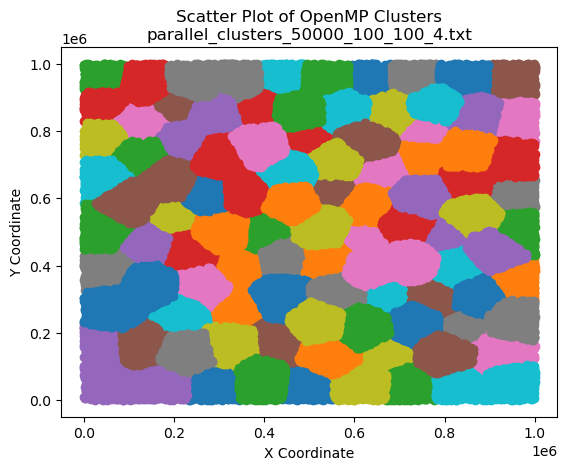

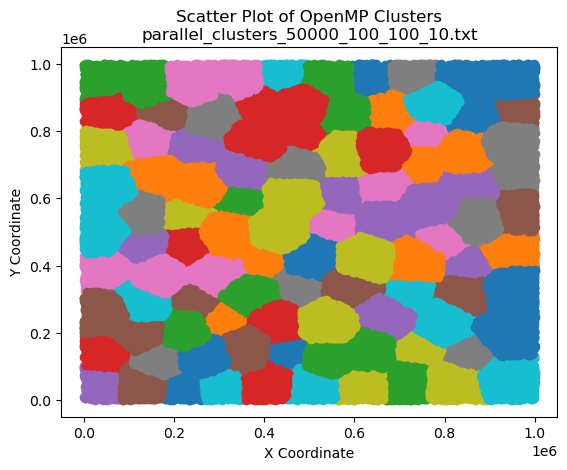

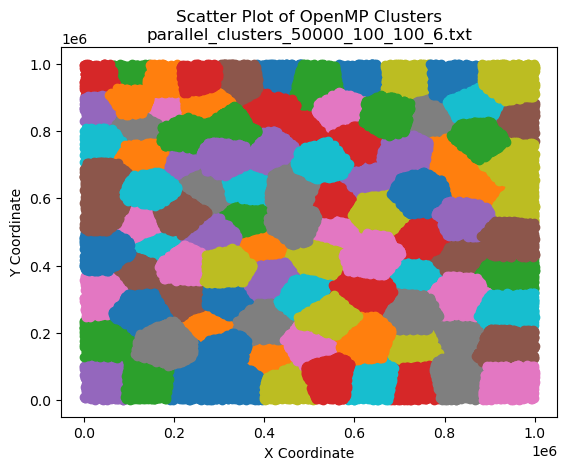

In [79]:
instances_dir = 'outputs/sanity_checks/'
parallel_instances = os.listdir(instances_dir)
for instance in parallel_instances:
    if 'parallel' not in instance:
        continue
    parts = instance.split('.')[0].split('_')
    file_number_of_points = int(parts[2])
    file_number_of_clusters = int(parts[3])
    file_number_of_iterations = int(parts[4])
    if file_number_of_points != number_of_points or file_number_of_clusters != number_of_clusters or file_number_of_iterations != number_of_iterations:
        continue
    data = pd.read_csv(instances_dir + instance)
    fig, ax = plt.subplots()
    for cluster in data['cluster_id'].unique():
        cluster_data = data[data['cluster_id'] == cluster]
        ax.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster}')
    # ax.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title('Scatter Plot of OpenMP Clusters' + '\n' + instance)
    plt.show()